## แบบฝึกหัดที่ 7

ให้นิสิตแสดงการสร้างและทดสอบประสิทธิภาพโมเดล KNN โดยใช้ชุดข้อมูล "Wholesale_customers_data.csv" ซึ่งมีรายละเอียดดังนี้:

**Attribute Information:**  
  
1) Fresh: annual spending (m.u.) on fresh products (Continuous);  
2) Milk: annual spending (m.u.) on milk products (Continuous);  
3) Grocery: annual spending (m.u.)on grocery products (Continuous);  
4) Frozen: annual spending (m.u.)on frozen products (Continuous)  
5) Detergents_paper: annual spending (m.u.) on detergents and paper products (Continuous)  
6) Delicassen: annual spending (m.u.)on and delicatessen products (Continuous);  
7) Channel<sup>*</sup>: customers channel - 1:Horeca (Hotel/Restaurant/Cafe) or 2:Retail channel (Nominal)  
8) Region: customers region - Lisnon, Oporto or Other (Nominal)

<sup>*</sup>Outcome/label variable  
monetary units = m.u.

โมเดลที่สร้างมีเป้าหมายเพื่อการทำนายตัวแปร Channel  
นิสิตจะต้องแบ่งชุดข้อมูลออกเป็นส่วนที่ใช้ในการ training และ test และแสดงการปรับข้อมูล พร้อมทั้งทดสอบประสิทธิภาพของโมเดลตามที่ได้อธิบายในบทเรียน  
โดยในส่วนการแบ่งข้อมูล train_test_split ให้ใช้ argument random_state=1234

&nbsp;  
#### <font color="#1f7d02">*Read Dataset*</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

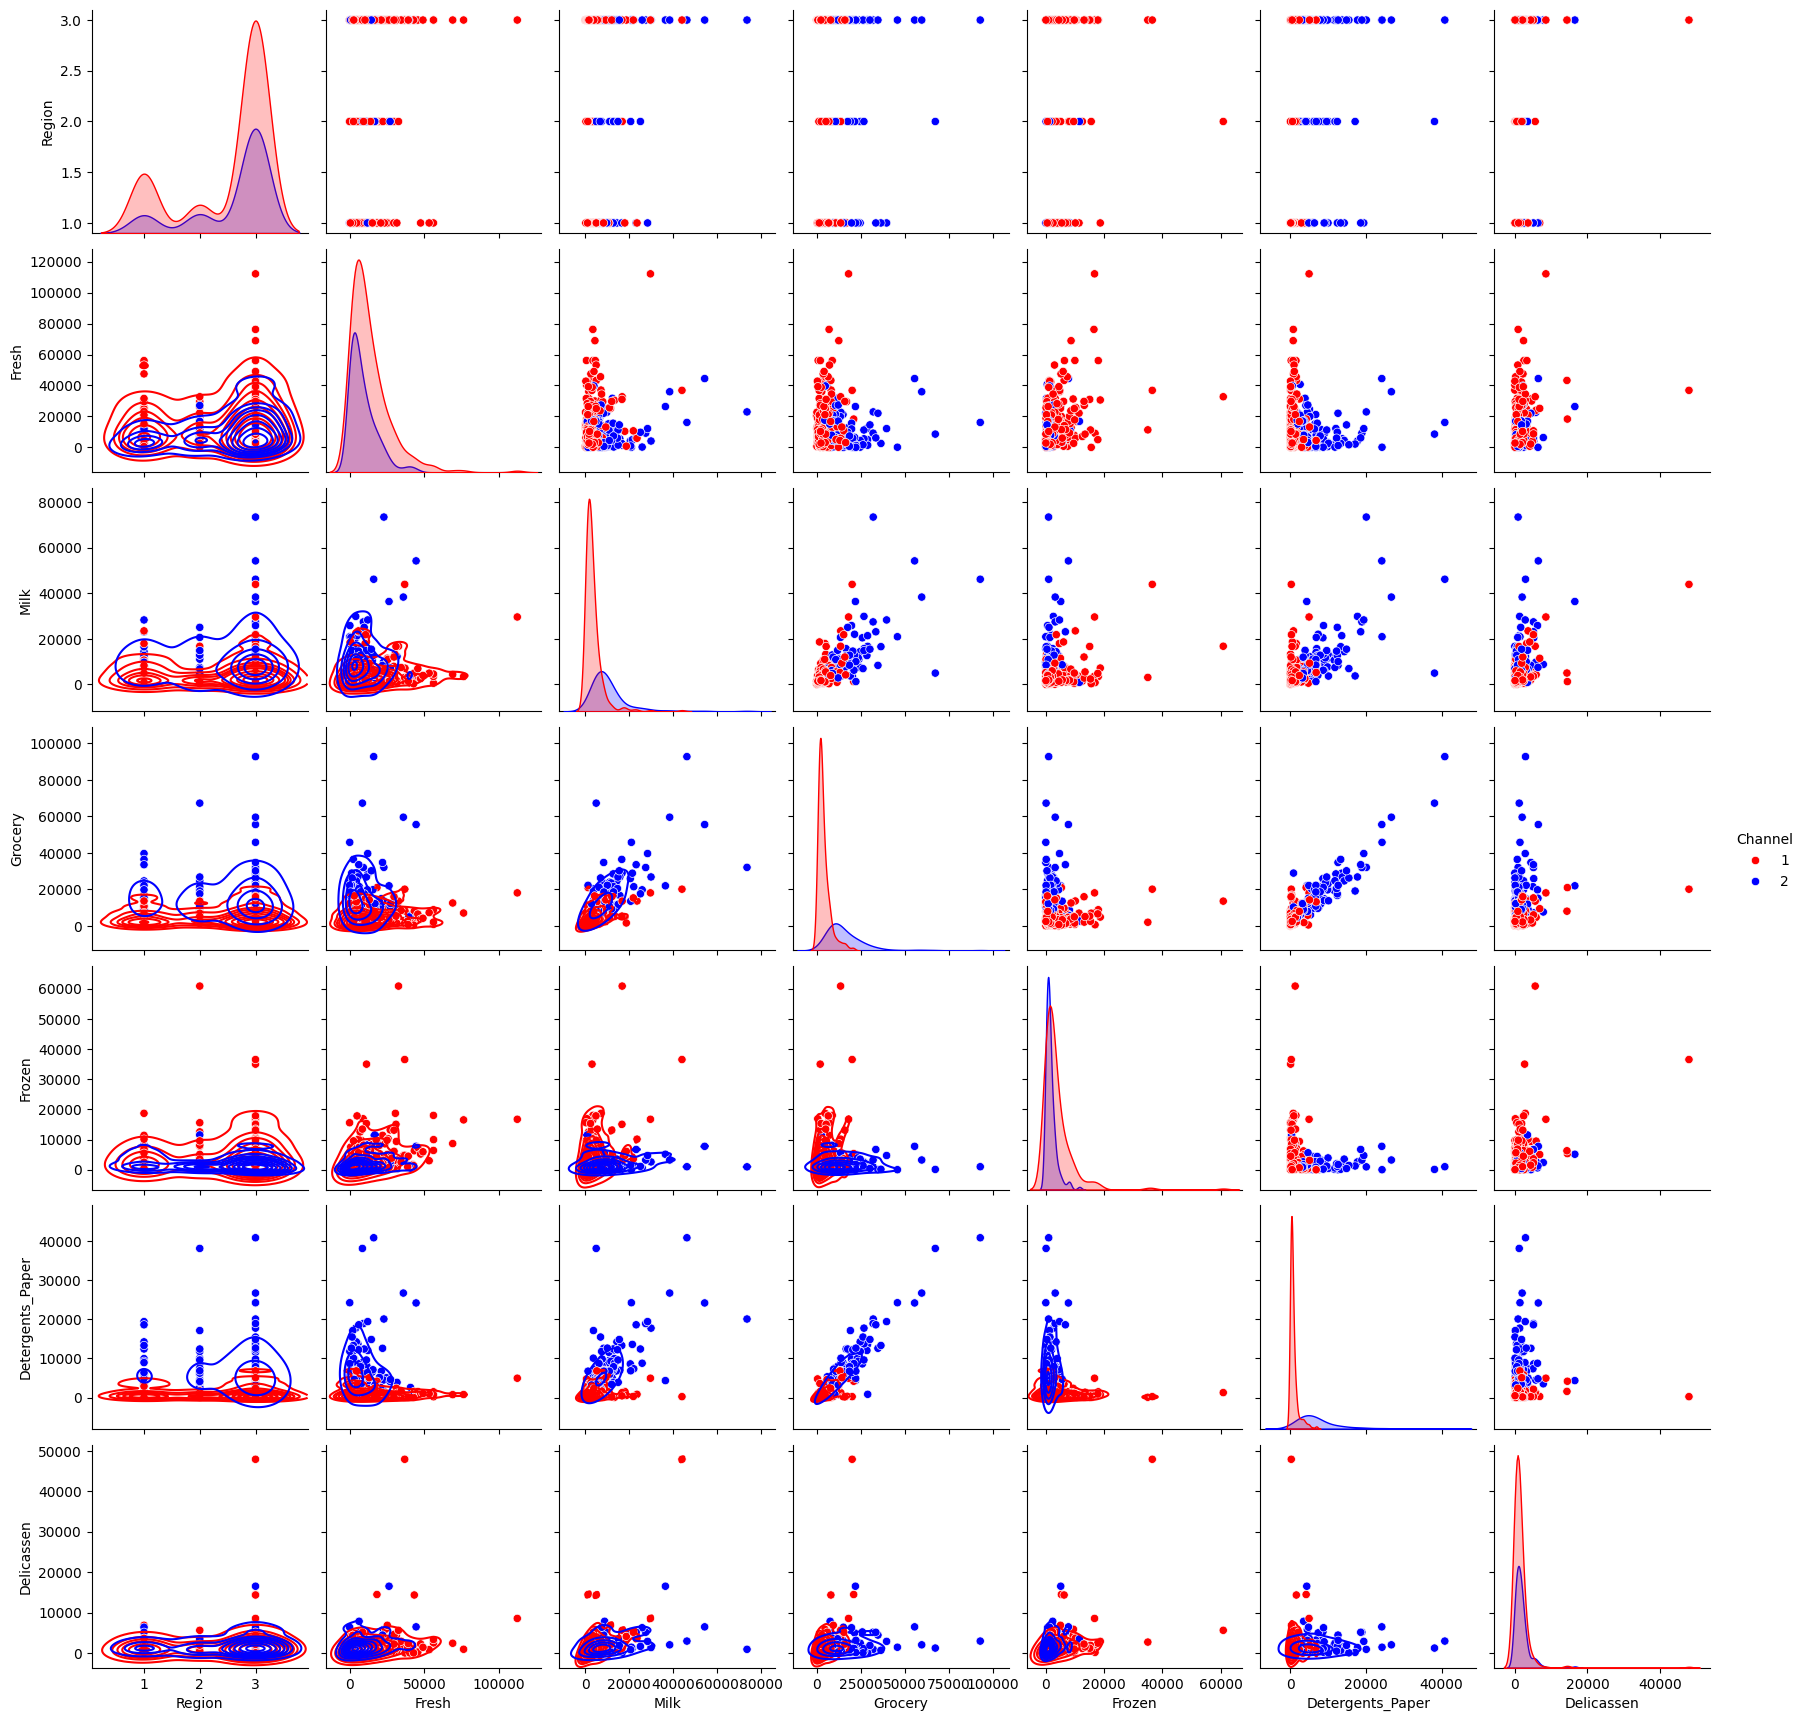

In [ ]:
g = sns.pairplot(data=df, hue='Channel', palette = {1:'r', 2:'b'})
g.map_lower(sns.kdeplot)

In [ ]:
corr = df.corr()
corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

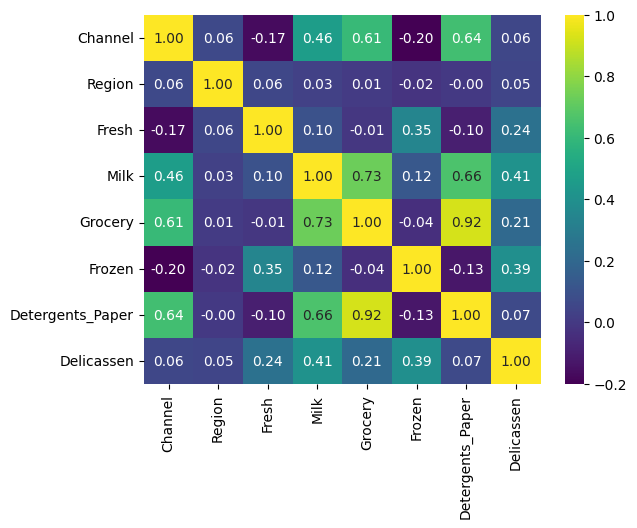

In [ ]:
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f")

&nbsp;  
#### <font color="#1f7d02">*Create feature and label data*</font>

In [ ]:
# Your code

In [ ]:
#(Optional): Region should be "category" and transformed to 0,1
df = df.astype({
    'Region': 'category',
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    int64   
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(1), int64(7)
memory usage: 24.8 KB


In [ ]:
categorical_cols = df.select_dtypes(include=['category']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
df

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3
0,2,12669,9656,7561,214,2674,1338,0,1
1,2,7057,9810,9568,1762,3293,1776,0,1
2,2,6353,8808,7684,2405,3516,7844,0,1
3,1,13265,1196,4221,6404,507,1788,0,1
4,2,22615,5410,7198,3915,1777,5185,0,1
...,...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,0,1
436,1,39228,1431,764,4510,93,2346,0,1
437,2,14531,15488,30243,437,14841,1867,0,1
438,1,10290,1981,2232,1038,168,2125,0,1


In [ ]:
X = df.loc[:,~(df.columns=='Channel')]
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1
1,7057,9810,9568,1762,3293,1776,0,1
2,6353,8808,7684,2405,3516,7844,0,1
3,13265,1196,4221,6404,507,1788,0,1
4,22615,5410,7198,3915,1777,5185,0,1
...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,1
436,39228,1431,764,4510,93,2346,0,1
437,14531,15488,30243,437,14841,1867,0,1
438,10290,1981,2232,1038,168,2125,0,1


In [ ]:
y = df['Channel']
y

,Channel
0,2
1,2
2,2
3,1
4,2
...,...
435,1
436,1
437,2
438,1


In [ ]:
y.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

&nbsp;  
#### <font color="#1f7d02">*Train Test Split*</font>

In [ ]:
# Your code (use random_state=1234)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1234)

In [ ]:
X_train.shape

(308, 8)

In [ ]:
X_test.shape

(132, 8)

In [ ]:
y_train.value_counts()

,count
Channel,
1,211
2,97


In [ ]:
y_test.value_counts()

,count
Channel,
1,87
2,45


&nbsp;  
#### <font color="#1f7d02">*Feature Data Scaling*</font>

In [ ]:
# Your code

In [ ]:
df.std(numeric_only=True)

,0
Channel,0.468052
Fresh,12647.328865
Milk,7380.377175
Grocery,9503.162829
Frozen,4854.673333
Detergents_Paper,4767.854448
Delicassen,2820.105937
Region_2,0.309234
Region_3,0.450397


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train) #Scaling parameters must based on training data.

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

In [ ]:
X_train_sc.std(numeric_only=True)

,0
Fresh,1.001627
Milk,1.001627
Grocery,1.001627
Frozen,1.001627
Detergents_Paper,1.001627
Delicassen,1.001627
Region_2,1.001627
Region_3,1.001627


In [ ]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [ ]:
X_test_sc.std(numeric_only=True)

,0
Fresh,1.000729
Milk,0.662259
Grocery,0.872723
Frozen,0.638917
Detergents_Paper,0.923875
Delicassen,0.605150
Region_2,1.179548
Region_3,1.046913


In [ ]:
X_test_sc

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_2,Region_3
0,0.296742,-0.666952,-0.668383,-0.423154,-0.505111,-0.405179,-0.322401,0.607362
1,-0.350641,-0.344663,-0.091289,-0.309687,0.164986,-0.318008,3.101724,-1.646464
2,-0.898023,-0.358395,-0.179730,-0.398853,-0.427990,0.035148,3.101724,-1.646464
3,-0.750243,-0.001836,-0.301842,-0.170797,-0.422042,-0.386340,-0.322401,0.607362
4,-0.517756,1.070935,1.281463,-0.206875,1.909659,-0.345468,-0.322401,0.607362
...,...,...,...,...,...,...,...,...
127,-0.574570,-0.284782,-0.292207,-0.384086,-0.181241,-0.126742,-0.322401,0.607362
128,0.049041,0.415964,0.652137,0.005479,0.445372,0.117210,-0.322401,0.607362
129,0.244682,-0.406027,-0.411074,0.214655,-0.529725,0.330828,-0.322401,-1.646464
130,-0.879164,0.596966,0.850012,-0.283891,0.791394,0.099329,-0.322401,0.607362


&nbsp;  
#### <font color="#1f7d02">*Training, perform prediction, and optimize K*</font>

In [ ]:
# Your code

In [ ]:
Ks = np.arange(1,31,1)
Ks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
scores = {}
scores['K'] = []
scores['accuracy'] = []
scores['precision_w'] = []
scores['recall_w'] = []
scores['f1_w'] = []


for k in Ks:
    model = knn(n_neighbors=k) # n_neighbors = value for K-neighbors
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    scores['K'].append(k)
    scores['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    scores['precision_w'].append(metrics.precision_score(y_test, y_pred, average='weighted'))
    scores['recall_w'].append(metrics.recall_score(y_test, y_pred, average='weighted'))
    scores['f1_w'].append(metrics.f1_score(y_test, y_pred, average='weighted'))

scores = pd.DataFrame(scores)
scores.sort_values(by=['accuracy','f1_w'], ascending=False).head(10)

,K,accuracy,precision_w,recall_w,f1_w
8,9,0.901515,0.901085,0.901515,0.901243
10,11,0.893939,0.893939,0.893939,0.893939
6,7,0.893939,0.893187,0.893939,0.893337
5,6,0.893939,0.893241,0.893939,0.892665
7,8,0.893939,0.893241,0.893939,0.892665
4,5,0.886364,0.887065,0.886364,0.886660
11,12,0.886364,0.885847,0.886364,0.886050
12,13,0.886364,0.885847,0.886364,0.886050
9,10,0.886364,0.885746,0.886364,0.884608
14,15,0.878788,0.877683,0.878788,0.877331


&nbsp;  
#### <font color="#1f7d02">*Plot performance scores at different K*</font>

In [ ]:
# Your code

In [ ]:
df_forPlot = pd.melt(scores,
                     value_vars = ['accuracy', 'precision_w', 'recall_w', 'f1_w'],
                     id_vars = ['K'],
                     var_name = 'Metric',
                     value_name = 'Score')
df_forPlot.head()

,K,Metric,Score
0,1,accuracy,0.833333
1,2,accuracy,0.840909
2,3,accuracy,0.863636
3,4,accuracy,0.878788
4,5,accuracy,0.886364


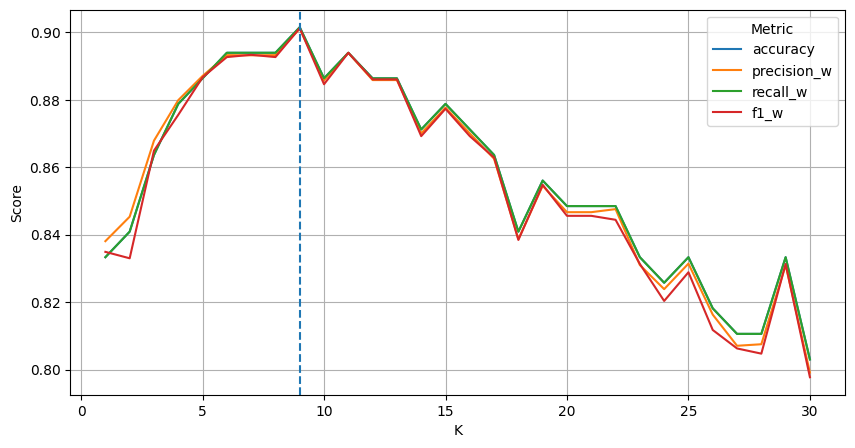

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_forPlot,
             x = 'K',
             y = 'Score',
             hue = 'Metric',
             ax=ax)
plt.grid()
plt.axvline(x=9, ls="--")

&nbsp;  
#### <font color="#1f7d02">*Confusion matrix of test set when using the best K*</font>

In [ ]:
# Your code

In [ ]:
model = knn(n_neighbors=9)
model.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = model.predict(X_test_sc)

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, labels=[1, 2])
conf_mat

array([[81,  6],
       [ 7, 38]])

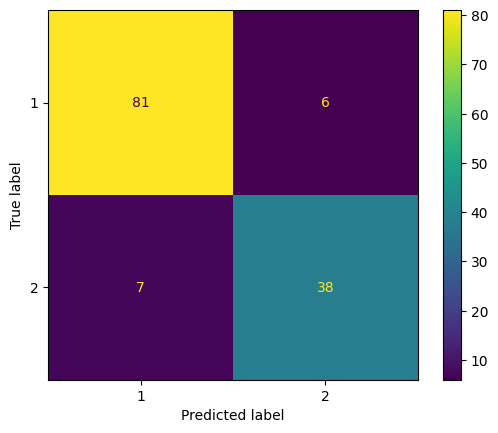

In [ ]:
metrics.ConfusionMatrixDisplay(conf_mat, display_labels=[1,2]).plot()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.93      0.93        87
           2       0.86      0.84      0.85        45

    accuracy                           0.90       132
   macro avg       0.89      0.89      0.89       132
weighted avg       0.90      0.90      0.90       132

